In [1]:
import matplotlib.pyplot as plt
import numpy as np
#from exojax.spec.premodit import logf_bias

In [2]:
from exojax.utils.constants import hcperk, Tref

def East(T):
    return -1. / (hcperk * (1. / T - 1. / Tref))

In [3]:
import matplotlib.pyplot as plt

In [9]:
Tarr = np.linspace(100,2000, 100)
Earr = np.logspace(2,4,1000)

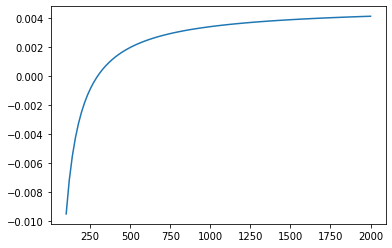

In [10]:
plt.plot(Tarr,1/East(Tarr))
#plt.xscale("log")

In [11]:
def x(T, dE):
    return dE/(2.*East(T))

def f(E,T):
    return np.exp(E/East(T))

def ds(x):
    return 0.5*(np.exp(x) + np.exp(-x)) - 1

def dse(T,Ttyp,dE,E):
    E1 = E - dE/2.
    E2 = E + dE/2.
    epsilon1 = f(E1,Ttyp)
    epsilon2 = f(E2,Ttyp)
    epsilonl = f(E,Ttyp)
    depsilon = epsilon2 - epsilon1 
    c1 = (epsilon2 - epsilonl)/depsilon
    c2 = (epsilonl - epsilon1)/depsilon
    xx=x(T,dE)
    return c1*np.exp(-xx) + c2*np.exp(xx) - 1

In [12]:
dse(1000,1000,100,1000)

2.220446049250313e-16

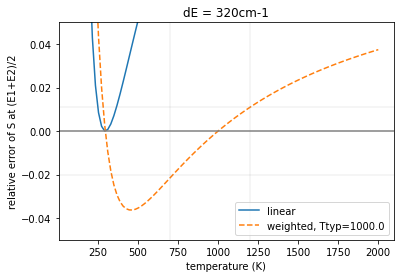

In [21]:
#plt.plot(Tarr,x(Tarr,100))
Ttyp1=1000.
#Ttyp2=00.0
dE=320
El=100
plt.plot(Tarr,ds(x(Tarr,dE)),label="linear")
plt.plot(Tarr, dse(Tarr,Ttyp1, dE, El),label="weighted, Ttyp="+str(Ttyp1),ls="dashed")
#plt.plot(Tarr, dse(Tarr,Ttyp2, dE, El),label="weighted, Ttyp="+str(Ttyp2),ls="dotted")
plt.legend()
plt.ylim(-0.05,0.05)
plt.title("dE = "+str(dE)+"cm-1")
plt.axhline(0.0,color="gray")
plt.axvline(1200,color="gray",alpha=0.1)
plt.axhline(0.011,color="gray",alpha=0.1)
plt.axvline(700,color="gray",alpha=0.1)
plt.axhline(-0.02,color="gray",alpha=0.1)

#plt.axvline(296.,ymax=0.25,color="red",alpha=0.2)
plt.xlabel("temperature (K)")
plt.ylabel("relative error of S at (E1+E2)/2")
plt.savefig("analytic_est.png")

In [73]:
f = np.exp(logf_bias(Earr,1000.0))


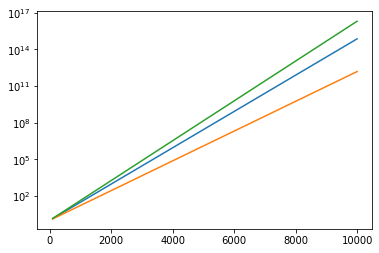

In [74]:
plt.plot(Earr, np.exp(logf_bias(Earr,1000.0)))
plt.plot(Earr, np.exp(logf_bias(Earr,700.0)))
plt.plot(Earr, np.exp(logf_bias(Earr,1300.0)))

plt.yscale("log")
#plt.xscale("log")
#plt.xlim(100,10000)

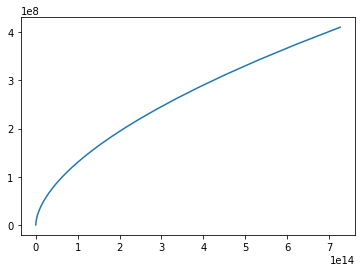

In [75]:
plt.plot(np.exp(logf_bias(Earr,1000.0)), np.exp(logf_bias(Earr,500.0)))


#plt.plot(np.exp(logf_bias(Earr,1000.0)), np.exp(logf_bias(Earr,2000.0)))


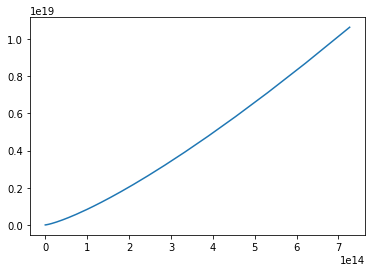

In [77]:
plt.plot(np.exp(logf_bias(Earr,1000.0)), np.exp(logf_bias(Earr,3000.0)))